<a href="https://colab.research.google.com/github/hyetae/2023-graduate/blob/main/preprocessing/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Channel

##RGB

In [ ]:
img = cv2.imread('/content/drive/MyDrive/cell-data/cropped.jpeg')
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(RGB)

(-0.5, 800.5, 800.5, -0.5)

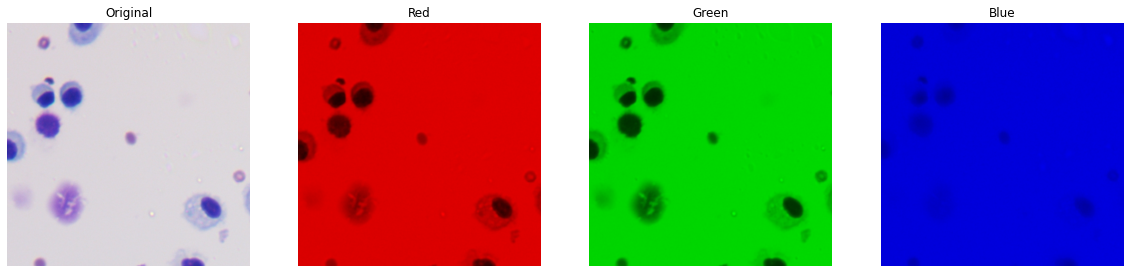

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(RGB)
RGB[:,:,0]=R
RGB[:,:,1]=0
RGB[:,:,2]=0
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Red")
plt.imshow(RGB)
RGB[:,:,0]=0
RGB[:,:,1]=G
RGB[:,:,2]=0
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Green")
plt.imshow(RGB)
RGB[:,:,0]=0
RGB[:,:,1]=0
RGB[:,:,2]=B
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Blue")
plt.imshow(RGB)
plt.axis("off")

(-0.5, 800.5, 800.5, -0.5)

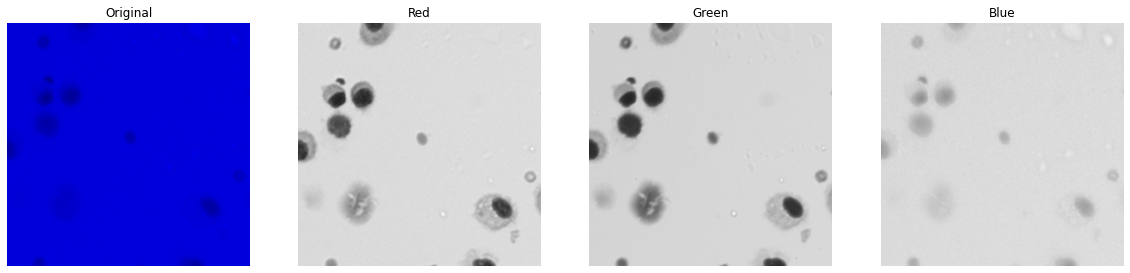

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(RGB)
RGB[:,:,0]=R
RGB[:,:,1]=R
RGB[:,:,2]=R
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Red")
plt.imshow(RGB)
RGB[:,:,0]=G
RGB[:,:,1]=G
RGB[:,:,2]=G
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Green")
plt.imshow(RGB)
RGB[:,:,0]=B
RGB[:,:,1]=B
RGB[:,:,2]=B
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Blue")
plt.imshow(RGB)
plt.axis("off")

##HSV

In [ ]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HSV = cv2.cvtColor(RGB, cv2.COLOR_RGB2HSV)
H,S,V = cv2.split(HSV)

(-0.5, 800.5, 800.5, -0.5)

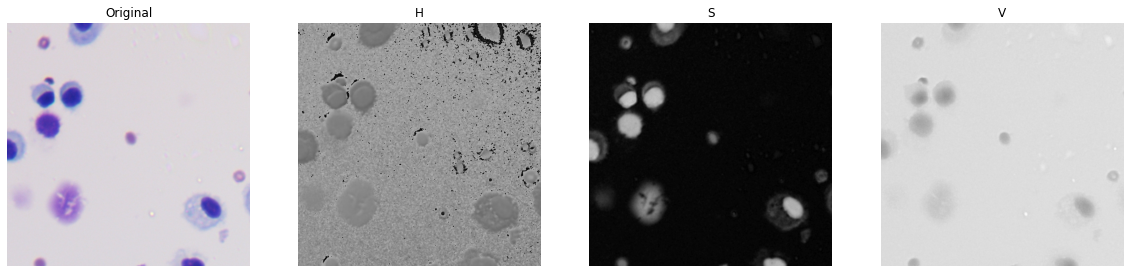

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(RGB)
RGB[:,:,0]=H
RGB[:,:,1]=H
RGB[:,:,2]=H
plt.axis("off")
plt.subplot(1,4,2)
plt.title("H")
plt.imshow(RGB)
RGB[:,:,0]=S
RGB[:,:,1]=S
RGB[:,:,2]=S
plt.axis("off")
plt.subplot(1,4,3)
plt.title("S")
plt.imshow(RGB)
RGB[:,:,0]=V
RGB[:,:,1]=V
RGB[:,:,2]=V
plt.axis("off")
plt.subplot(1,4,4)
plt.title("V")
plt.imshow(RGB)
plt.axis("off")

##YCrCb

In [ ]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
YCrCb = cv2.cvtColor(RGB, cv2.COLOR_RGB2YCrCb)
Y,Cr,Cb = cv2.split(YCrCb)

(-0.5, 800.5, 800.5, -0.5)

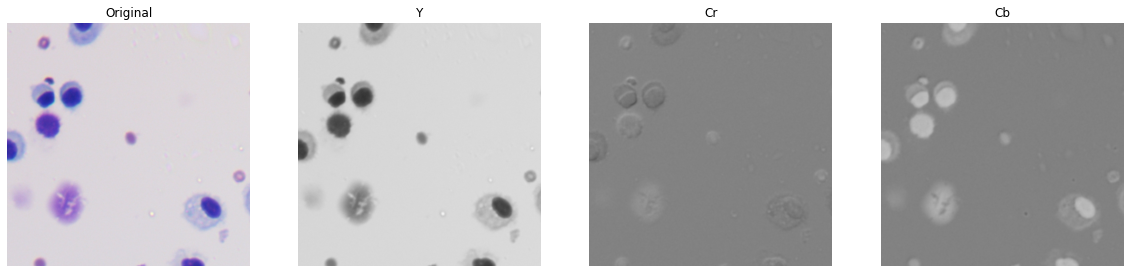

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(RGB)
RGB[:,:,0]=Y
RGB[:,:,1]=Y
RGB[:,:,2]=Y
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Y")
plt.imshow(RGB)
RGB[:,:,0]=Cr
RGB[:,:,1]=Cr
RGB[:,:,2]=Cr
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Cr")
plt.imshow(RGB)
RGB[:,:,0]=Cb
RGB[:,:,1]=Cb
RGB[:,:,2]=Cb
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Cb")
plt.imshow(RGB)
plt.axis("off")

#Contrast

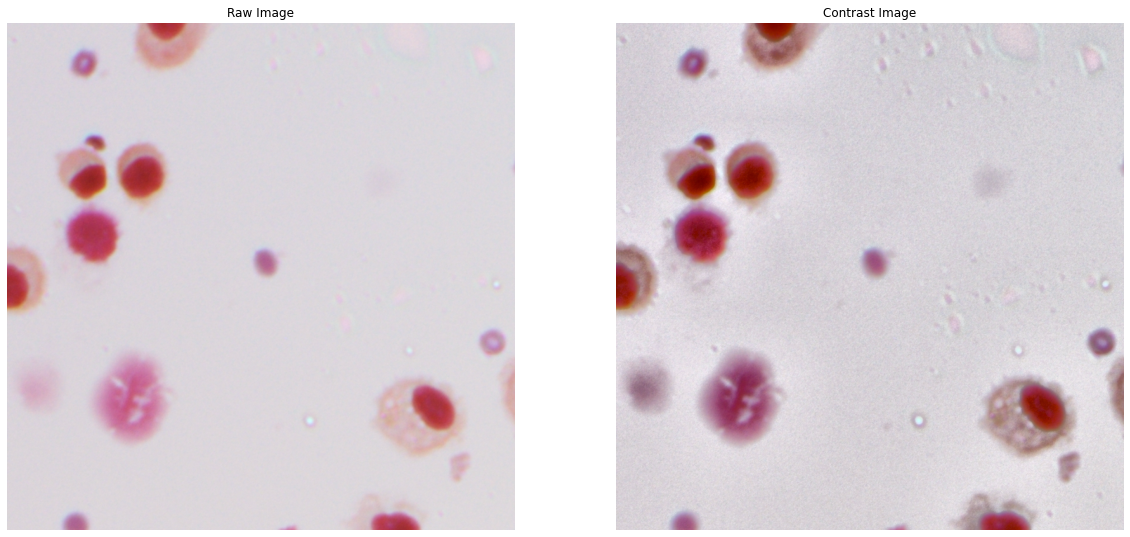

In [ ]:
def img_contrast(img):
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  l, a, b = cv2.split(lab)

  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
  cl = clahe.apply(l)

  limg = cv2.merge((cl, a, b))
  bgr = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

  return bgr
  
img = cv2.imread('/content/drive/MyDrive/cell-data/cropped.jpeg')
contrast = img_contrast(img)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Raw Image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Contrast Image")
plt.imshow(contrast)
plt.axis("off")
plt.show()

#Color Distribution


In [ ]:
def color_distribution_(img):
  colors = ['b', 'g', 'r']
  bgr_planes = cv2.split(img)

  for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

  plt.xlim(180,240)
  plt.show()

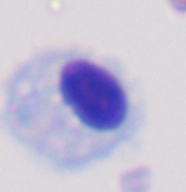

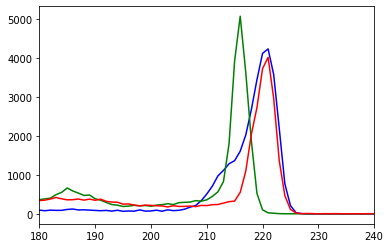

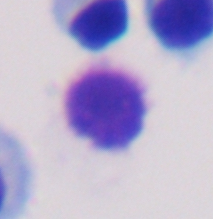

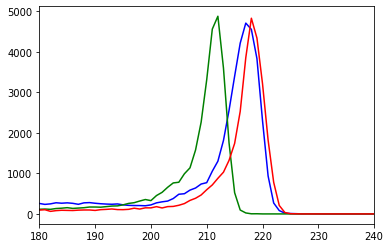

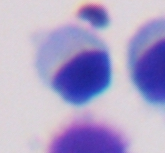

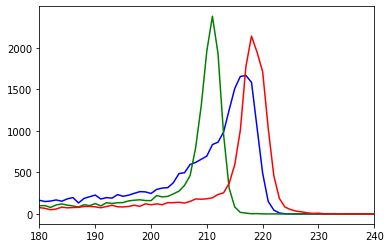

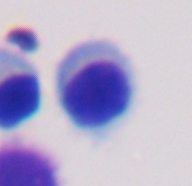

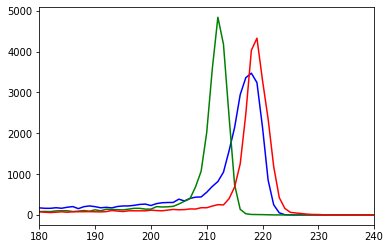

In [ ]:
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
res, thr = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours) - 1):
    cnt = contours[i+1]
    x, y, w, h = cv2.boundingRect(cnt)
    if w+h < 80:
      continue
    else:
      img_cut = img[y-h:y+2*h, x-w:x+2*w]
      cv2_imshow(img_cut)
      color_distribution_(img_cut)

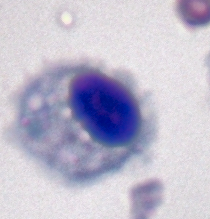

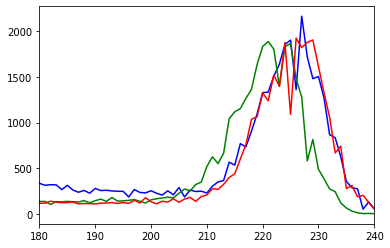

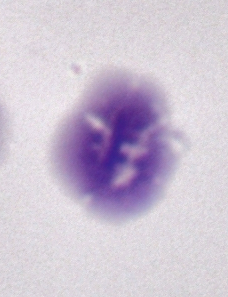

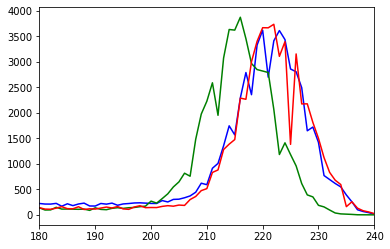

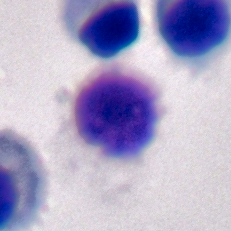

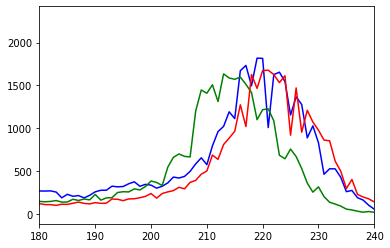

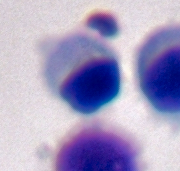

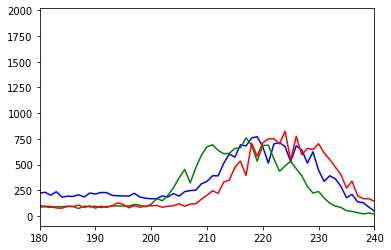

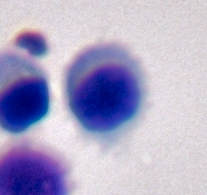

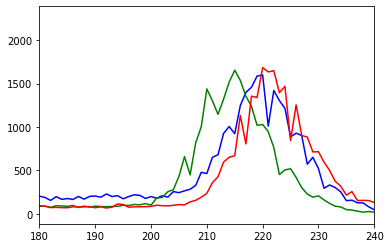

In [ ]:
RGB = cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
res, thr = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours) - 1):
    cnt = contours[i+1]
    x, y, w, h = cv2.boundingRect(cnt)
    if w+h < 80:
      continue
    else:
      img_cut = contrast[y-h:y+2*h, x-w:x+2*w]
      cv2_imshow(img_cut)
      color_distribution_(img_cut)